# Exercise
At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [64]:
import pandas as pd


In [88]:
df=pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


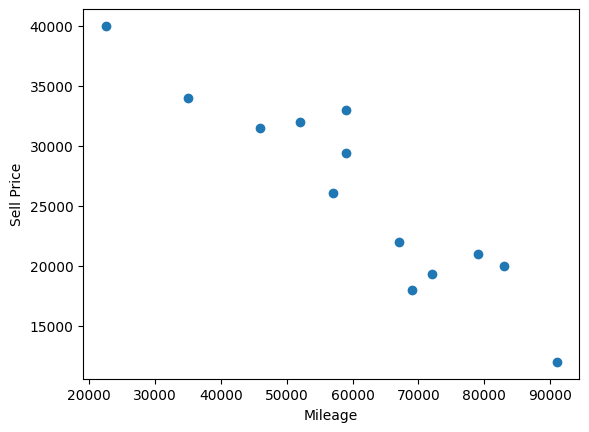

In [66]:
import matplotlib.pyplot as plt

plt.scatter(df["Mileage"], df["Sell Price"])
plt.xlabel("Mileage")
plt.ylabel("Sell Price")
plt.show()

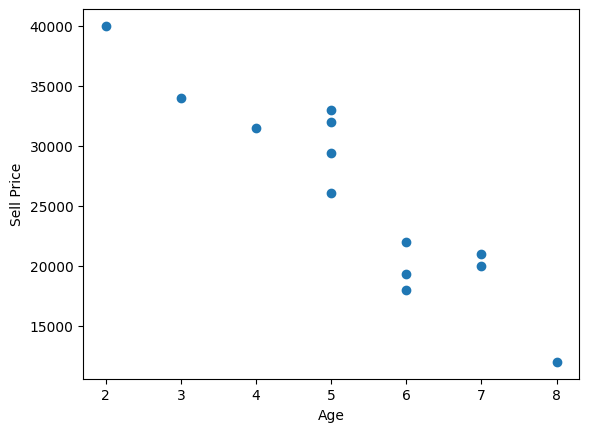

In [67]:
plt.scatter(df["Age"], df["Sell Price"])
plt.xlabel("Age")
plt.ylabel("Sell Price")
plt.show()

Convert Car Model into numbers first.

In [68]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
dfle=df
dfle["Car Model"]=le.fit_transform(dfle["Car Model"])
dfle

,Car Model,Mileage,Sell Price,Age
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


Create X and y

In [69]:
X=dfle[["Car Model","Mileage","Age"]].values
X


array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]])

In [70]:
y = dfle["Sell Price"].values

One Hot Encoding

Now convert first column (Car Model) into dummy variables.

In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [("Car Model", OneHotEncoder(drop='first'), [0])],
    remainder="passthrough"
)


X = ct.fit_transform(X)

X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

Dummy Variable Trap

In [72]:
dfle = df.copy()

Train Model

In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

Price of mercedez benz that is 4 yr old with mileage 45000

In [74]:
model.predict([[0, 1, 45000, 4]])

array([36991.31721062])

Price of BMW X5 that is 7 yr old with mileage 86000

In [86]:
dfle = df.copy()

le = LabelEncoder()
dfle["Car Model"] = le.fit_transform(dfle["Car Model"])

X = dfle[["Car Model","Mileage","Age"]].values
y = dfle["Sell Price"].values

ct = ColumnTransformer(
    [("Car Model", OneHotEncoder(drop='first'), [0])],
    remainder="passthrough"
)

X = ct.fit_transform(X)

model = LinearRegression()
model.fit(X,y)

model.predict([[0,1,45000,4]])
model.predict([[0,0,86000,7]])

array([15365.40972059])